In [38]:
# Import Required Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# plotly 
import plotly.graph_objects as go



In [ ]:
# File path for the new dataset
file_path ="C:/Users/JalpaZenisha/DSI/visualization/02_activities/assignments/2024 Cultural Festivals Funding Program recipients.csv"

# Load the CSV file
df = pd.read_csv(file_path)

# Inspect the data
print(df.head())  # Display the first few rows
print(df.info())  # Check column names, data types, and missing values


   _id                            Project Name  \
0    1  African Fashion & Culture Week Toronto   
1    2                Fusion of Taste Festival   
2    3                 2024 TAIWANfest Toronto   
3    4       Panamerican Food & Music Festival   
4    5                            Big on Bloor   

               Organization Legal Name   Stream  Grant               Ward  \
0             Afro Centre for the Arts  Project  10000     Toronto Centre   
1          Albion Islington Square BIA  Project   7500    Etobicoke North   
2  Arts for Canadians Tomorrow Society  Project   7500  Spadina-Fort York   
3        Artsxplosion Cultural Society  Project  10000     Toronto Centre   
4          BIG Bloor Improvement Group  Project  10000          Davenport   

   Year  
0  2024  
1  2024  
2  2024  
3  2024  
4  2024  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------          

In [25]:
print(df.describe())  # Summary statistics for numeric columns


            _id          Grant    Year
count  49.00000      49.000000    49.0
mean   25.00000   39500.000000  2024.0
std    14.28869  105439.309163     0.0
min     1.00000    5000.000000  2024.0
25%    13.00000    7500.000000  2024.0
50%    25.00000   10000.000000  2024.0
75%    37.00000   15000.000000  2024.0
max    49.00000  600000.000000  2024.0


In [26]:
# Data Cleaning and Preparation : Identify and handle any missing values:

print(df.isnull().sum())  # Check for null values



_id                        0
Project Name               0
Organization Legal Name    0
Stream                     0
Grant                      0
Ward                       0
Year                       0
dtype: int64


In [29]:
# Rename columns if needed to make them more intuitive:
# renaming stream to Project_Type
df.rename(columns={
    "Stream": "Project_Type"
}, inplace=True)

#renaming grant to Funding_Amount
df.rename(columns={
    "Grant": "Funding_Amount"
}, inplace=True)


In [30]:
df

,_id,Project Name,Organization Legal Name,Project_Type,Funding_Amount,Ward,Year
0,1,African Fashion & Culture Week Toronto,Afro Centre for the Arts,Project,10000,Toronto Centre,2024
1,2,Fusion of Taste Festival,Albion Islington Square BIA,Project,7500,Etobicoke North,2024
2,3,2024 TAIWANfest Toronto,Arts for Canadians Tomorrow Society,Project,7500,Spadina-Fort York,2024
3,4,Panamerican Food & Music Festival,Artsxplosion Cultural Society,Project,10000,Toronto Centre,2024
4,5,Big on Bloor,BIG Bloor Improvement Group,Project,10000,Davenport,2024
5,6,The 45th Annual Cabbagetown Festival,Cabbagetown Business Improvement Area,Project,10000,Toronto Centre,2024
6,7,Toronto Dragon Festival,Canadian Association of Chinese Performing Arts,Project,10000,Toronto Centre,2024
7,8,Rastafest in Little Jamaica,Canadian Reggae Music Association,Project,10000,Eglinton-Lawrence,2024
8,9,The International Jerk Food & Music Festival,Caribbean Promotions Arts & Culture Inc.,Project,15000,Etobicoke Centre,2024
9,10,Scarborough Summerfest 2024,Chinese Cultural Centre of Greater Toronto,Project,10000,Scarborough North,2024


In [ ]:
# Aggregate Funding by Project_Type
# Group by project type to get total funding:

funding_by_project_type = df.groupby('Project_Type')['Funding_Amount'].sum()
print(funding_by_project_type)
# Analyze the Data


Project_Type
Annual Operating         410000
Multi-Year Operating    1100000
Project                  425500
Name: Funding_Amount, dtype: int64


In [32]:
# Aggregate Funding by ward
# Group by ward to get total funding:

funding_by_Ward = df.groupby('Ward')['Funding_Amount'].sum()
print(funding_by_Ward)


Ward
Beaches- East York                                                                                  10000
Davenport                                                                                           50000
Eglinton-Lawrence                                                                                   27500
Etobicoke Centre                                                                                    15000
Etobicoke North                                                                                      7500
Etobicoke North/ Parkdale-High Park/ York South-Weston/ University-Rosedale                         10000
Humber River - Black Creek                                                                          14000
Multiple                                                                                           507500
Parkdale-High Park                                                                                  20000
Scarborough Centre                       

In [35]:
# Identify Top Funded Festivals
# Finding festivals that received the highest funding:

top_festivals = df.sort_values(by='Funding_Amount', ascending=False)
print(top_festivals.head(5))


    _id                           Project Name        Organization Legal Name  \
14   15             Toronto Caribbean Carnival  Festival Management Committee   
41   42                               Luminato       Toronto Festival of Arts   
30   31  Pride Toronto Festival 2024/2025/2026                  Pride Toronto   
34   35                     Salsa on St. Clair               Salsa in Toronto   
10   11           CONTACT Photography Festival   CONTACT Photography Festival   

            Project_Type  Funding_Amount                Ward  Year  
14  Multi-Year Operating          600000   Spadina-Fort York  2024  
41  Multi-Year Operating          400000            Multiple  2024  
30      Annual Operating          260000      Toronto Centre  2024  
34  Multi-Year Operating          100000  Toronto-St. Paul's  2024  
10      Annual Operating           50000            Multiple  2024  


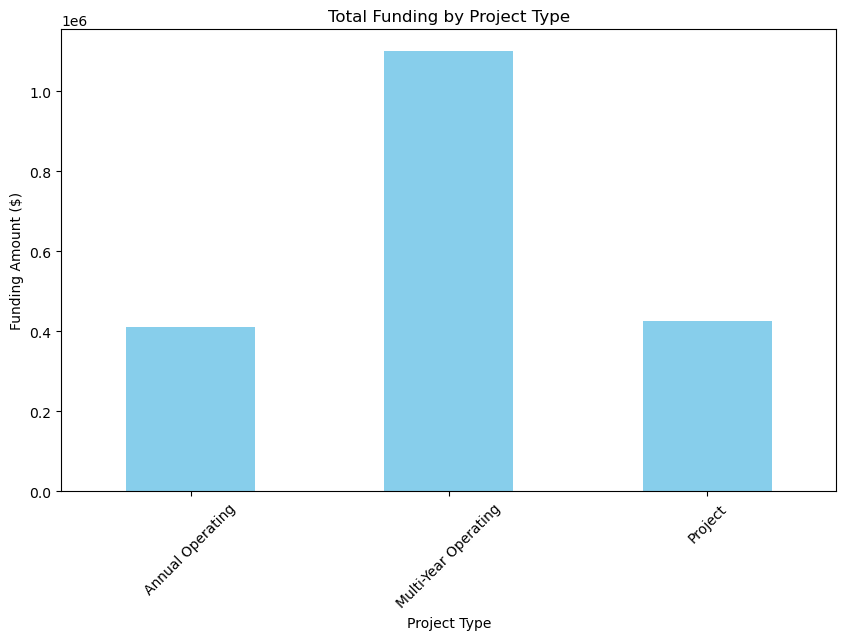

In [33]:
# Create Visualizations
#Visualization 1: Total Funding by Festival Type

plt.figure(figsize=(10, 6))
funding_by_project_type.plot(kind='bar', color='skyblue')
plt.title('Total Funding by Project Type')
plt.xlabel('Project Type')
plt.ylabel('Funding Amount ($)')
plt.xticks(rotation=45)
plt.show()


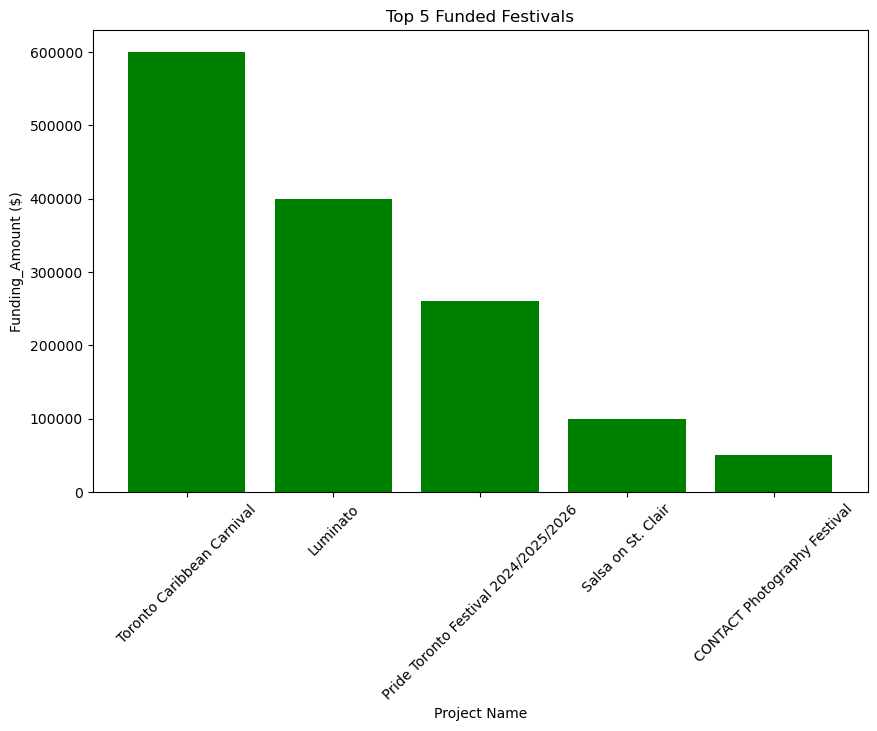

In [37]:
# Visualization 2: Top 5 Funded Festivals
top_5_festivals = top_festivals.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_5_festivals['Project Name'], top_5_festivals['Funding_Amount'], color='green')
plt.title('Top 5 Funded Festivals')
plt.xlabel('Project Name')
plt.ylabel('Funding_Amount ($)')
plt.xticks(rotation=45)
plt.show()


In [42]:
funding_by_Ward


Ward
Beaches- East York                                                                                  10000
Davenport                                                                                           50000
Eglinton-Lawrence                                                                                   27500
Etobicoke Centre                                                                                    15000
Etobicoke North                                                                                      7500
Etobicoke North/ Parkdale-High Park/ York South-Weston/ University-Rosedale                         10000
Humber River - Black Creek                                                                          14000
Multiple                                                                                           507500
Parkdale-High Park                                                                                  20000
Scarborough Centre                       

In [ ]:
# converted column in to list for plotting in plotly

filtered_amount = list(filter(lambda x: x >= 50000, Funding_Amount))
Ward_Name = df['Ward']


In [62]:
Ward_Name

0                                        Toronto Centre
1                                       Etobicoke North
2                                     Spadina-Fort York
3                                        Toronto Centre
4                                             Davenport
5                                        Toronto Centre
6                                        Toronto Centre
7                                     Eglinton-Lawrence
8                                      Etobicoke Centre
9                                     Scarborough North
10                                             Multiple
11                                   Beaches- East York
12                                    Eglinton-Lawrence
13                                    Scarborough North
14                                    Spadina-Fort York
15                                    Spadina-Fort York
16                                    Spadina-Fort York
17                                     Toronto-D

In [59]:
filtered_amount

[50000, 600000, 260000, 100000, 50000, 400000, 50000]

In [64]:
graph = go.Figure()
graph.add_trace(go.Bar(x = Ward_Name, y = filtered_amount))

graph.update_layout(title = "50k>= Grant Allocated by Ward",
                    xaxis_title = "Ward ",
                    yaxis_title = "Funding Amount(Grant)")
